# Geothermal Data Analytics

## Business Problem

**1. Context**

A company engaged in renewable energy with a focus on geothermal exploration and development desired to conduct data analysis to assist in geothermal resource assessment. The company wants to assess and analyze geothermal resources in various locations that signify geothermal potential that has prospects for further development.


**2. Business Problem Statement**

Where geothermal areas are prospective for further exploration to provide long-term economic benefits for the company?


**3. Goals**

So based on these problems, the company wants to know what factors/variables make a geothermal prospect area worthy of further exploration, so that they can make a better plan in assessing geothermal resources.

**4. Analytical Approach**

Therefore, what we will do here is to analyze the data to find geothermal prospect areas based on the geothermal operation dataset.

## Data Understanding 

Dataset source provided from the University of North Dakota - https://engineering.und.edu/research/global-heat-flow-database/data.html.

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Data Number | Categorical | Data number are purely arbitrary |
| Codes | Categorical | The system of descriptive codes developed by Lee and Uyeda (1965)  |
| Site Name | Categorical | The name is included for ease of recognition |
| Latitude | Numerical | Coordinate of latitude |
| Longitude | Numerical | Coordinate of longitude |
| Elevation | Numerical | The elevation of the solid surface at the measuring point like dry land or sea bed |
| Min. Depth | Numerical | Minimum depth of observation |
| Max Depth | Numerical | Maximum depth of observation |
| No. Temperatures | Numerical | Describe how many temperature points were used in the calculation of temperature gradient |
| Temp. Gradient | Numerical | Value of temperature gradient measurement, unit in mK/m |
| No. Conductivities | Numerical | Describe how many conductivity measurements used, if 0 means the conductivity has been estimated by rock type, whereas a blank signifies lack of information |
| Conductivity | Numerical | Value of average conductivity measurement, has only been recorded if the individual values are reasonably uniform or if the borehole penetrates a single rock-type, unit in W/mK |
| No. Heat Production | Categorical | Records the number of samples used for analysis of heat production by radioactive decay |
| Heat Production | Numerical | Represent the average heat production at the heat flow site |
| Heat Flow | Numerical | Value of heat flow measurement, unit in mW/m^2 |
| Red. Heat Flow | Numerical | "Reduced Heat Flow" - the actual level of heat flow out of the earth after correcting for disturbance factors and surface variability. |
| No. Sites | Numerical | Number of the individual sites |
| Reference No. | Numerical | Gives the source of the data according to the bibliography that follows the data list such Lee and Uyeda (1965) and Simmons and Horai (1968) |

Note: 
- Most features are numeric, with some categorical features having high cardinality.
- The descriptive codes condensed into six letters, represented geographical area, tectonic setting, temperature measurements, conductivity measurements, corrections, consistency

Descriptive codes explanation

**1. Geographical Area**

this code describes the major geographical unit in which the individual site lies

- A; Africa
- B; North America
- C; South America
- D; Australia
- E; Europe and Asia
- F; Miscellaneous lands, including New Zealand, Pacific Islands, Icelands
- N; Atlantic Ocean
- O; Indian Ocean
- P; Pacific Ocean
- Q; Arcic Ocean
- R; Mediterranean, Red, Black, and Caspian Seas
- S; Other Marginal Seas (Caribbean, Philippine, etc)

**2. Tectonic Setting**

this code describes the last orogenic disturbance to have affected the site area

- A; Archaean	
- B; Proterozoic
- C; Phanerozoic non-orogenic	
- D; Early Paleozoic orogeny	
- E; Late Paleozoic orogeny	
- F; Mesozoic orogeny
- G; Tertiary orogeny or volcanic zone	
- H; Geothermal area
- I; Continental shelf	
- N; Ocean basin	
- O; Ocean ridge or rise - active spreading centre	
- P; Ocean trench
- Q; Continental rise	
- R; Continental slope	
- S; Aseismic ridge	
- T; Fracture zone	
- U; Island arc	
- Y; Unknown	
- Z; Not specified	


**3. Temperature Measurements**

at land and lake sites, this code describes the nature of the temperature measurement site, and not the method of instrument, whereas at ocean sites this code describes the measurement instrument when a sea-bottom probe was used.

- A; In borehole - all vertical boreholes	
- B; In mine - horizontal boreholes only
- C; In tunnel - one level	
- K; In lake bottom by shallow-water techniques	
- L; In lake bottom by oceanographic techniques	
- N; Bullard-type probe
- O; Ewing-type probe	
- P; Other probes
- Q; Deep sea borehole	
- Z; Not Specified	


**4. Conductivity Measurements**

describes the technique of conductivity measurement

- A; Divided bar	
- B; Transient method in laboratory
- C; Downhole-probe	
- D; Chips in divided bar	
- E; Other laboratory method	
- F; Estimated by correlation with nearby holes
- G; Estimated from the literature		
- N; Needle probe	
- O; Water content	
- P; Chlorine content
- Q; In situ method	
- R; Other methods	
- S; Estimated from nearby sites	
- T; Estimated from sediment lithology	
- Z; Not specified	

**5. Corrections**

describes the corrections that have been made to the measurements

- A; Climate change	
- B; Topographic irregularity
- C; Sedimentation or erosion on land	
- D; Nearby bodies of water	
- E; Water circulation	
- F; Refraction by conductivity contrast
- G; Composite corrections - land	
- H; None
- I; Estimated by author to be zero or small
- J; Rejected by compiler	
- N; Sedimentation	
- O; Sea-floor topography	
- P; Water temperature variation
- Q; Composite correction - sea - lake	
- R; None -sea
- Z; Not specified	

**6. Consistency**

- A; Less than 10%, or full probe penetration (at least 2 gradient measurements)	
- B; Greater than 10% but less than 20%, or probe tilt 15-30 degrees and/or only 1 gradient measurement, or large uncertainty in conductivity
- C; Greater than 20% or probe tilt 30 degrees or only one sediment temperature measurement	
- D; Probe tilt not determined	
- E; Indeterminate

## Data Loading 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import json
from IPython.display import display
from scipy.stats import normaltest
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [2]:
data = r'fsu.csv'
df = pd.read_csv(data, sep=',', header=0, na_values='.')

In [3]:
df

,Data Number,Codes,Site Name,Latitude,Longitude,Elevation,Min. Depth,Max Depth,No. Temperatures,Temp. Gradient,No. Conductivities,Conductivity,No. Heat Production,Heat Production,Heat Flow,Red. Heat Flow,No. Sites,Reference No.
0,A,EAAAHB,26P,53.5830,26.3500,NaN,140.0,310.0,31.0,10.0,25.0,3.10,NaN,NaN,30,NaN,125.0,85.0
1,A,EAAAHB,NaN,53.3670,26.6000,NaN,179.0,377.0,41.0,9.0,22.0,3.20,NaN,NaN,29,NaN,125.0,85.0
2,A,EAAAIB,16,49.4500,29.2500,NaN,30.0,166.0,12.0,14.0,8.0,1.85,NaN,NaN,25,NaN,52.0,79.0
3,A,EAABAB,3,69.0500,30.1170,NaN,25.0,470.0,45.0,13.0,NaN,2.80,NaN,NaN,41,NaN,67.0,68.0
4,A,EAABHA,1,64.4670,33.1830,NaN,20.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,88.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424,SU1782,EEABIA,ORLOV573,50.9175,81.3014,290.0,30.0,260.0,45.0,18.0,20.0,2.71,NaN,NaN,49,3.0,89.0,NaN
4425,SU1783,EEABHB,LENI1545,50.3511,83.6681,1060.0,30.0,690.0,67.0,21.0,16.0,2.90,NaN,NaN,61,2.0,89.0,NaN
4426,SU1784,EEABIA,TARGY228,49.5175,82.7675,795.0,30.0,680.0,82.0,15.0,30.0,2.62,NaN,NaN,39,3.0,89.0,NaN
4427,SU1785,EEABHB,MALE4069,49.8847,84.2508,640.0,30.0,660.0,49.0,24.0,7.0,2.94,NaN,NaN,70,2.0,89.0,NaN


In [4]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4429 entries, 0 to 4428
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data Number          4428 non-null   object 
 1   Codes                4063 non-null   object 
 2   Site Name            3939 non-null   object 
 3   Latitude             4429 non-null   float64
 4   Longitude            4429 non-null   float64
 5   Elevation            2185 non-null   float64
 6   Min. Depth           3361 non-null   float64
 7   Max Depth            3671 non-null   float64
 8   No. Temperatures     3017 non-null   float64
 9   Temp. Gradient       3359 non-null   float64
 10  No. Conductivities   1376 non-null   float64
 11  Conductivity         3351 non-null   float64
 12  No. Heat Production  211 non-null    object 
 13  Heat Production      215 non-null    float64
 14  Heat Flow            4429 non-null   int64  
 15  Red. Heat Flow       3268 non-null   f

In [5]:
df.shape

(4429, 18)

In [6]:
df.columns

Index(['Data Number', 'Codes', 'Site Name', 'Latitude', 'Longitude',
       'Elevation', 'Min. Depth', 'Max Depth', 'No. Temperatures',
       'Temp. Gradient', 'No. Conductivities', 'Conductivity',
       'No. Heat Production', 'Heat Production', 'Heat Flow', 'Red. Heat Flow',
       'No. Sites', 'Reference No.'],
      dtype='object')

# Exploratory Data Analysis

#### Descriptive Statistics 

In [7]:
df.describe()

,Latitude,Longitude,Elevation,Min. Depth,Max Depth,No. Temperatures,Temp. Gradient,No. Conductivities,Conductivity,Heat Production,Heat Flow,Red. Heat Flow,No. Sites,Reference No.
count,4429.000000,4429.000000,2185.000000,3361.000000,3671.000000,3017.000000,3359.000000,1376.000000,3351.000000,215.000000,4429.000000,3268.000000,4112.000000,3225.000000
mean,51.070479,64.067329,217.964760,449.412377,1292.349632,444.325820,35.664483,13.308866,2.030155,1.962791,55.738090,1.486536,56.874757,78.385116
std,7.755539,32.154290,507.951137,654.027799,1122.242160,478.550826,38.038494,24.606544,0.839136,1.888309,30.440481,1.634717,36.899413,6.361662
min,35.350000,19.983000,-1200.000000,-660.000000,1.000000,0.000000,2.000000,0.000000,0.180000,0.000000,9.000000,1.000000,1.000000,5.000000
25%,45.117000,37.917000,30.000000,45.000000,291.000000,10.000000,18.000000,2.000000,1.600000,0.500000,40.000000,1.000000,17.000000,73.000000
50%,51.600000,54.667000,125.000000,203.000000,1028.000000,82.000000,27.000000,7.000000,1.910000,0.800000,52.000000,1.000000,56.000000,80.000000
75%,55.550000,78.583300,400.000000,600.000000,2130.000000,999.000000,38.000000,16.000000,2.500000,4.000000,65.000000,1.000000,84.000000,84.000000
max,73.916700,178.833300,4795.000000,8101.000000,7593.000000,999.000000,530.000000,331.000000,9.400000,9.000000,790.000000,43.000000,168.000000,88.000000


In [8]:
df.describe(include=['O'])

,Data Number,Codes,Site Name,No. Heat Production
count,4428,4063,3939,211
unique,1896,284,2994,31
top,B,EGLOQB,BAIKAL,7 1.
freq,374,232,333,37


__Observation:__  
* The highest conductivity measurement is 9.4 W/mK.
* The highest heat flow measurement is 790 mW/m^2.
* The highest temperature gradient measurement is 530 mK/m.
* The descriptive code EGLOQB is the most frequent, represents that a large amount of the data has been collected within European region, with the last orogenic disturbance as tertiary orogeny or volcanic zone. The mode of descriptive related to thermal conductivity measurement is by using water content, while regarding the correction is by sea floor topography. This may indicate that many measurements are made in the sea or lake. Supported by the temperature measurement code, it is also dominant in In lake bottom by oceanographic techniques.
* Site named BAIKAL is the most frequent site name in terms of data.

#### Correlation of Features 

C:\Users\arbie\AppData\Local\Temp\ipykernel_13304\1628640831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='pearson')


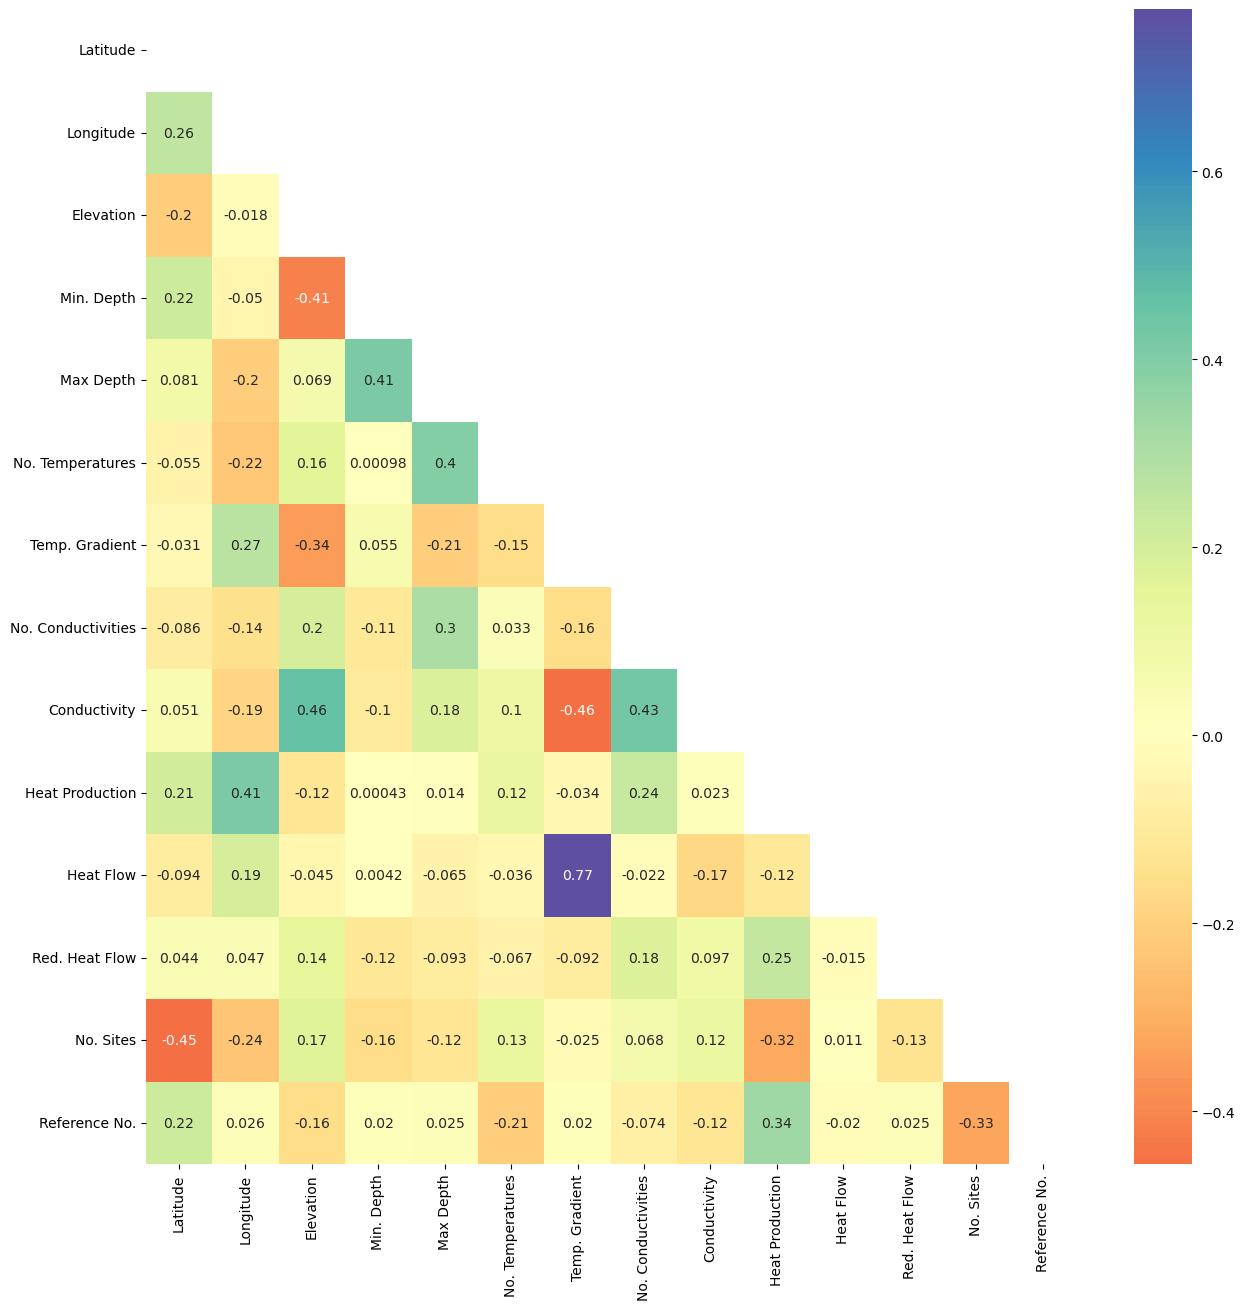

In [9]:
corrmat = df.corr(method='pearson')

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(corrmat, annot=True, cmap='Spectral', center=0, mask=mask)
plt.show()

From the feature correlation above, it can be seen that the relationship between the feature temperature gradient and heat flow has a fairly strong relationship, this makes sense when referring to the fourier law equation theory. An increase in temperature gradient will actually cause an increase in heat flow

### Handling Missing Value 

<Axes: >

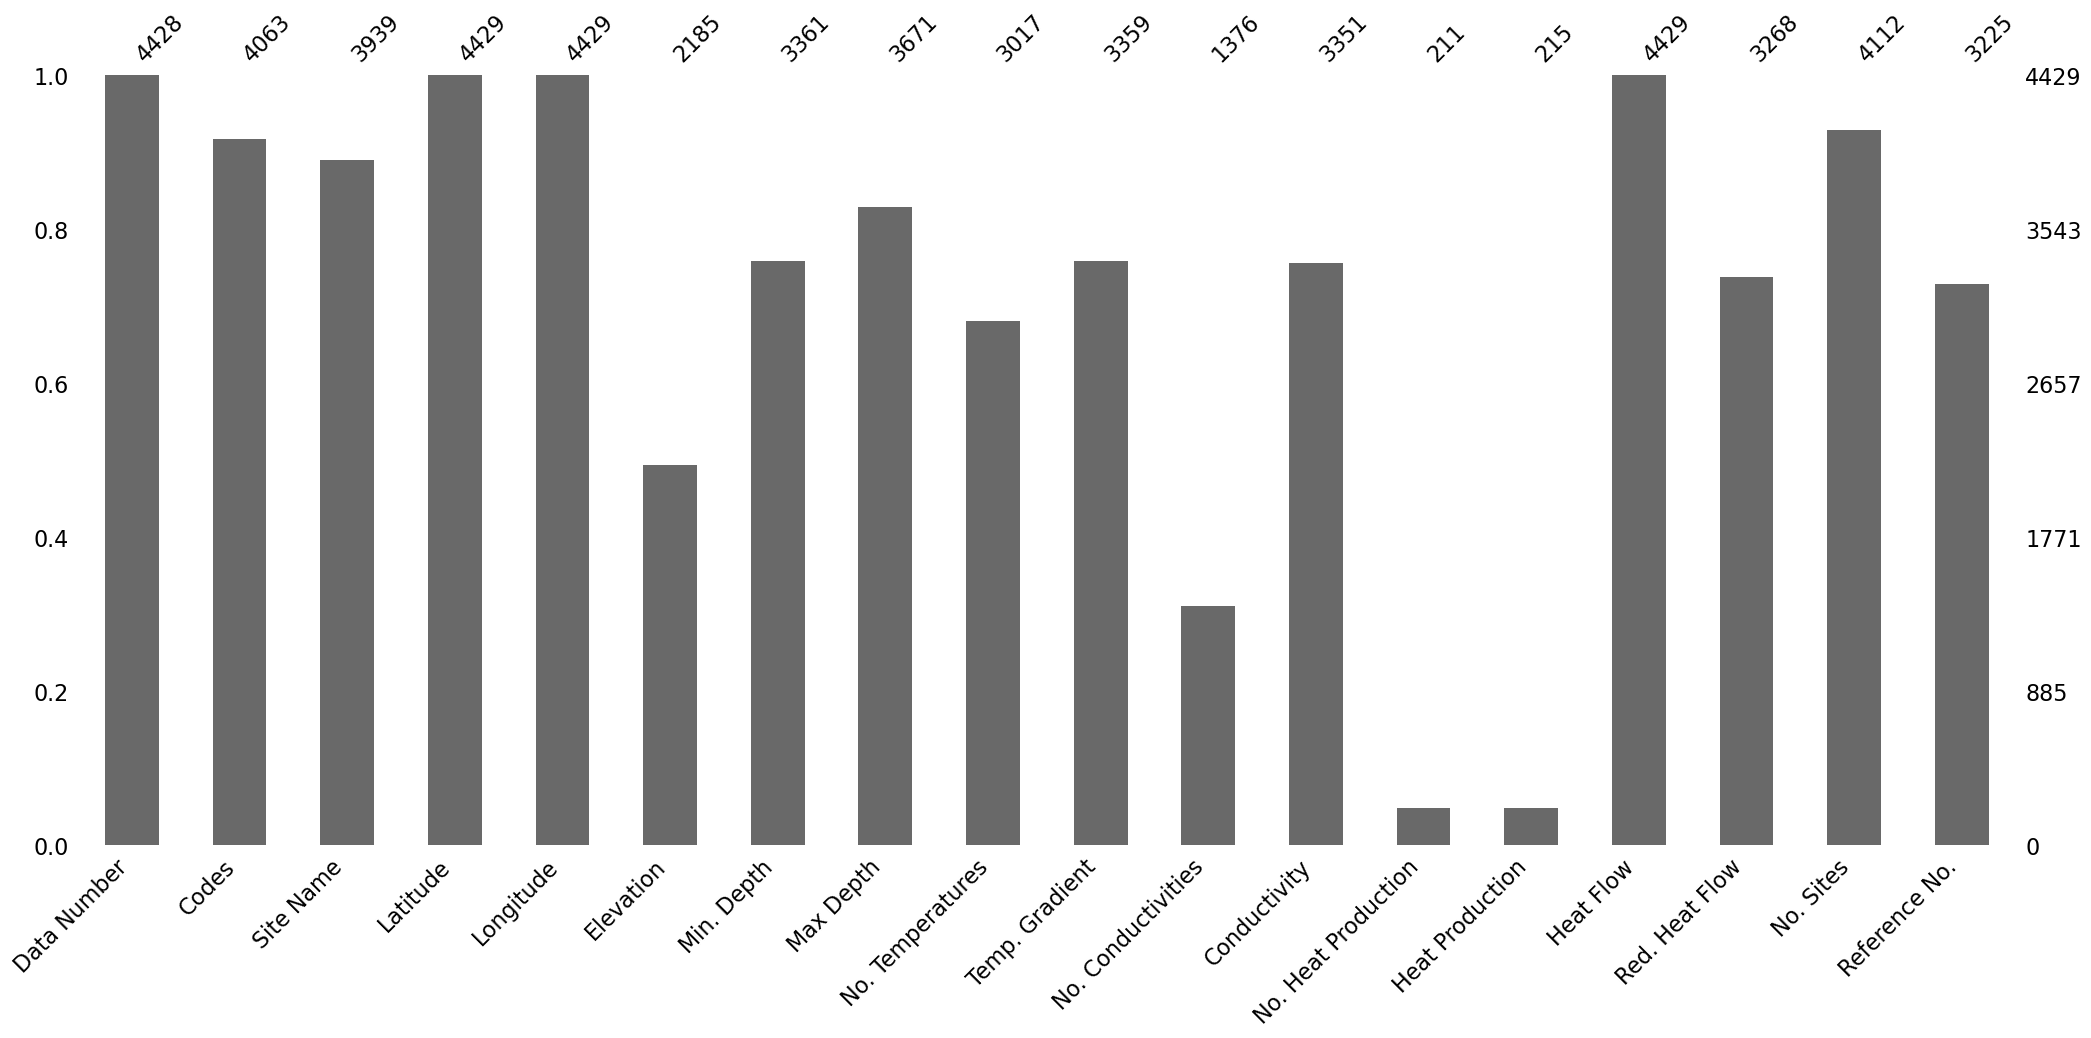

In [10]:
missingno.bar(df)

In this dataset, there are a lot of missing values in some columns. For columns that significantly have missing values will be dropped as in the `No. Heat Production`, `Heat Production`, `No. Conductivities columns`. The data that does not support the needs of the analysis will also be dropped such as `data number` and `reference`.

In [11]:
data_drop = ['Data Number','No. Conductivities','No. Heat Production','Heat Production', 'Reference No.']
df = df.drop(data_drop, axis=1)

<Axes: >

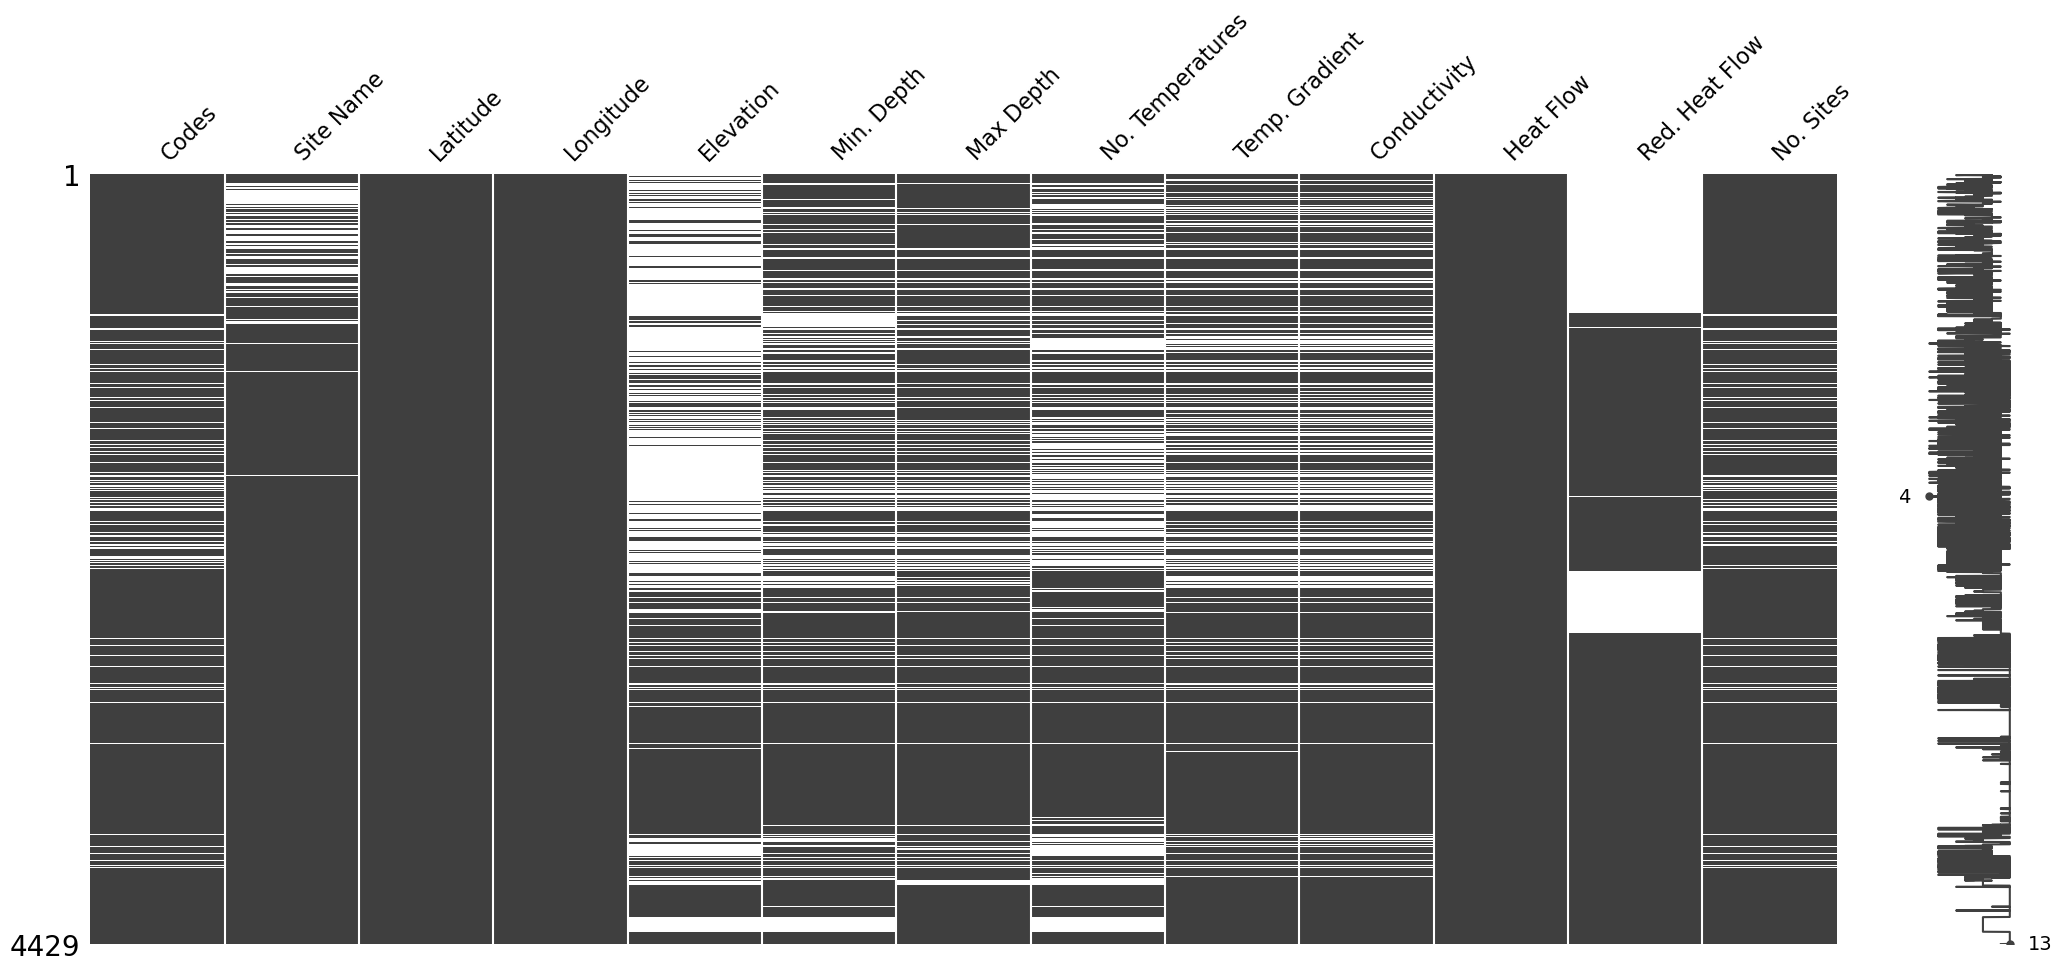

In [12]:
missingno.matrix(df)

In [13]:
df.isnull().sum()

Codes                366
Site Name            490
Latitude               0
Longitude              0
Elevation           2244
Min. Depth          1068
Max Depth            758
No. Temperatures    1412
Temp. Gradient      1070
Conductivity        1078
Heat Flow              0
Red. Heat Flow      1161
No. Sites            317
dtype: int64

In [14]:
df.isna().sum()/df.shape[0]*100

Codes                8.263716
Site Name           11.063445
Latitude             0.000000
Longitude            0.000000
Elevation           50.666065
Min. Depth          24.113795
Max Depth           17.114473
No. Temperatures    31.880786
Temp. Gradient      24.158952
Conductivity        24.339580
Heat Flow            0.000000
Red. Heat Flow      26.213592
No. Sites            7.157372
dtype: float64

For numerical features such as `No. Temperatures`, `Temp. Gradient`, `Conductivity` and `Red. Heat Flow` where missing values exist will be filled using the simple imputer technique. If the results of hypothesis testing show that the numerical feature data does not have a normal distribution then the simple imputer approach used is to use the median.

In [15]:
numerical_features = ['No. Temperatures','Temp. Gradient', 'Conductivity', 'Red. Heat Flow']

for feature in numerical_features:
    dp_statistics, df_pvalue = normaltest(df[feature].dropna())
    
    if df_pvalue > 0.05:
        print(f"{feature}: P-value: {df_pvalue}. We assume a normal distribution.")
    else:
        print(f"{feature}: P-value: {df_pvalue}. We do not assume a normal distribution.")

No. Temperatures: P-value: 0.0. We do not assume a normal distribution.
Temp. Gradient: P-value: 0.0. We do not assume a normal distribution.
Conductivity: P-value: 2.0099575656126654e-300. We do not assume a normal distribution.
Red. Heat Flow: P-value: 0.0. We do not assume a normal distribution.


In [16]:
# Simple imputation using median for all float features
simple_impute = SimpleImputer(strategy='median')
df[numerical_features] = simple_impute.fit_transform(df[numerical_features])

The imputation will be applied for numerical features related to distance such as `Elevation`, `Min. Depth`, and `Max Depth` with the KNN simple imputer because it is suitable for data that has characteristics such as borehole data because this method searches for the nearest neighbor based on the similarity of distance features in the data and then fills in the missing values based on the value of the most similar neighbor.

In [17]:
# Simple imputation using KNN for all distance-related features
distance_features = ['Elevation','Min. Depth', 'Max Depth']

# Create a KNNImputer with the desired number of neighbors (n_neighbors)
knn_impute = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Apply KNNImputer to the numerical features
df[distance_features] = knn_impute.fit_transform(df[distance_features])

In [18]:
df['Codes'].value_counts()

EGLOQB    232
EGABHB    225
EEAFAB    217
ECAFZD    120
EGAFHB    119
         ... 
EDAGHC      1
ECAEIB      1
ECAFJD      1
ECAEZE      1
EDABIB      1
Name: Codes, Length: 284, dtype: int64

In [19]:
df['Site Name'].value_counts()

BAIKAL      333
1            57
3            28
4            27
2            27
           ... 
CHELBASS      1
CH1,5,16      1
S.SERDY1      1
BALASHOV      1
MALE4069      1
Name: Site Name, Length: 2994, dtype: int64

In [20]:
categorical_features = ['Codes', 'Site Name']

# Create a SimpleImputer object with strategy 'constant'
imputer = SimpleImputer(strategy='constant', fill_value='undetermined')

# Fill missing values with 'undetermined' for the specified categorical features
df[categorical_features] = imputer.fit_transform(df[categorical_features])

In [21]:
df['Codes'].value_counts()

undetermined    366
EGLOQB          232
EGABHB          225
EEAFAB          217
ECAFZD          120
               ... 
EAABIR            1
ECAFGB            1
ECAFIC            1
EBAZHB            1
EDABIB            1
Name: Codes, Length: 285, dtype: int64

In [22]:
df['Site Name'].value_counts()

undetermined    490
BAIKAL          333
1                57
3                28
2                27
               ... 
CHELBASS          1
CH1,5,16          1
S.SERDY1          1
BALASHOV          1
MALE4069          1
Name: Site Name, Length: 2995, dtype: int64

For categorical data, simple imputation with mode is not performed because it will make a certain unique value in the feature become so dominant. Instead the existence of missing values in categorical features will be filled with undetermined.

As for the `No. Sites` feature, we will drop the missing value because there is only 7.15% missing value percentage which is relatively small, and if we drop it, we will not lose much data

In [23]:
df = df.dropna()

<Axes: >

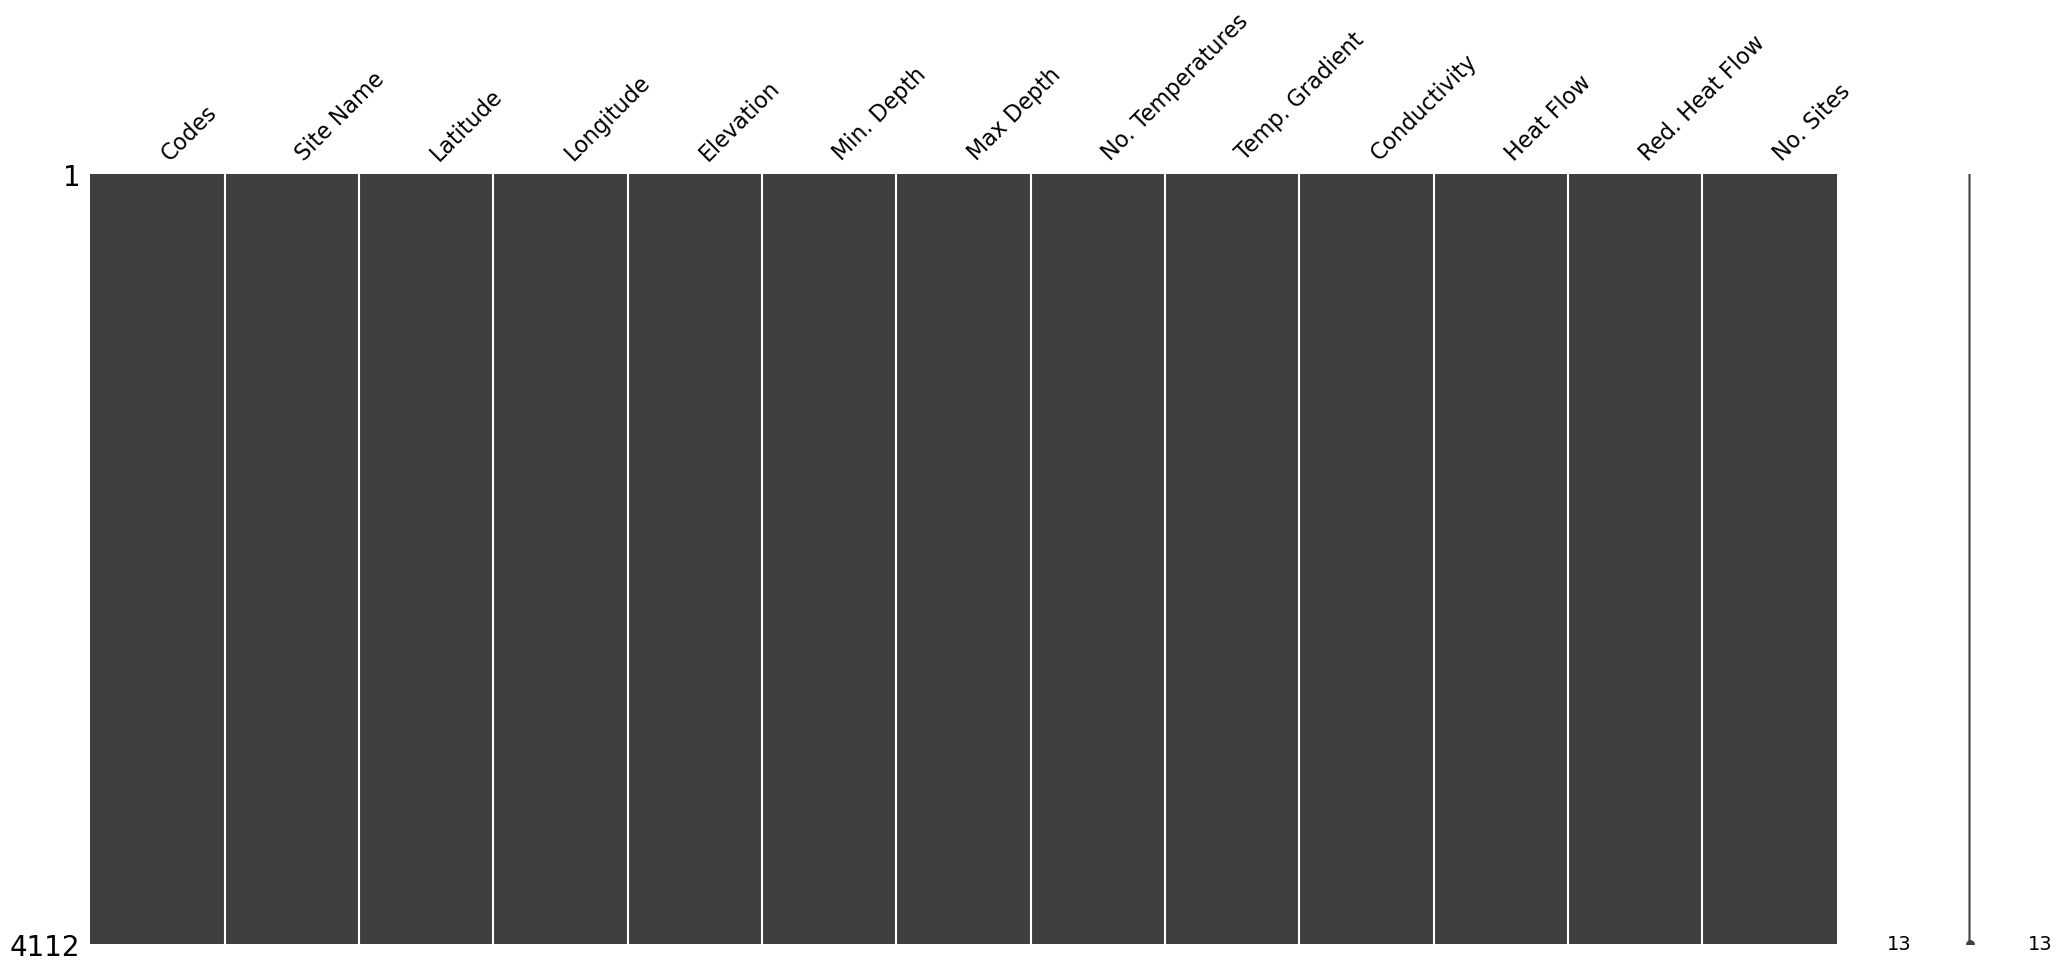

In [24]:
missingno.matrix(df)

#### Outlier, Anomaly, and Ilogical Data Detection 

<Axes: >

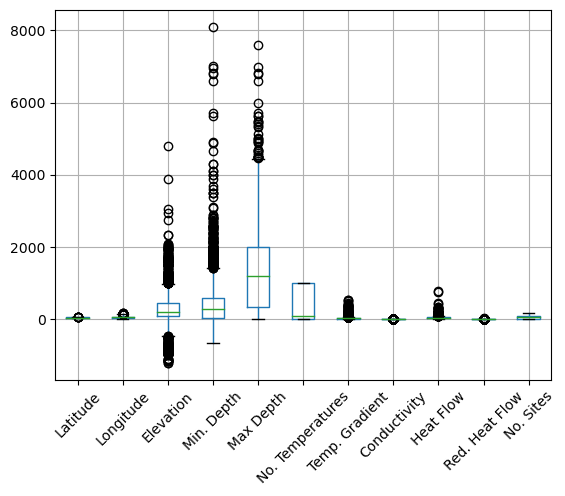

In [25]:
df.boxplot(rot=45)

In [26]:
numerical_features = ['Latitude', 'Longitude', 'Elevation', 'Min. Depth', 'Max Depth', 'No. Temperatures', 'Temp. Gradient', 
                      'Conductivity', 'Heat Flow', 'Red. Heat Flow', 'No. Sites']

# Iterate through numerical features to count data below zero
for feature in numerical_features:
    # Check if the feature is numerical (i.e., float or integer)
    if np.issubdtype(df[feature].dtype, np.number):
        count_below_zero = (df[feature] < 0).sum()
        print(f"Total data with '{feature}' below 0: {count_below_zero}")

Total data with 'Latitude' below 0: 0
Total data with 'Longitude' below 0: 0
Total data with 'Elevation' below 0: 411
Total data with 'Min. Depth' below 0: 42
Total data with 'Max Depth' below 0: 0
Total data with 'No. Temperatures' below 0: 0
Total data with 'Temp. Gradient' below 0: 0
Total data with 'Conductivity' below 0: 0
Total data with 'Heat Flow' below 0: 0
Total data with 'Red. Heat Flow' below 0: 0
Total data with 'No. Sites' below 0: 0


In [27]:
df = df[(df['Min. Depth'] > 0)]

<Axes: >

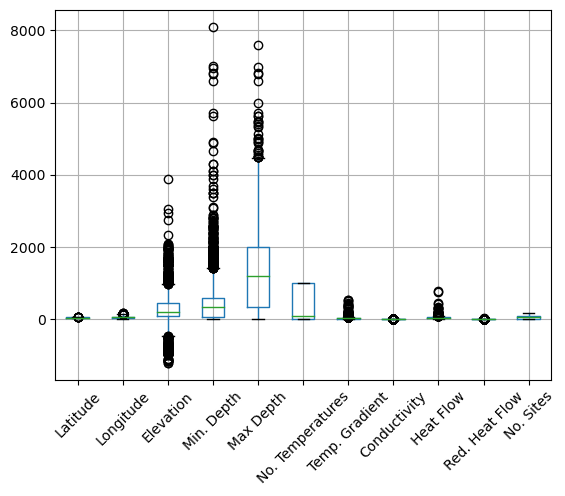

In [28]:
df.boxplot(rot=45)

In [29]:
df = df[(df['Min. Depth'] < 8000)]

<Axes: >

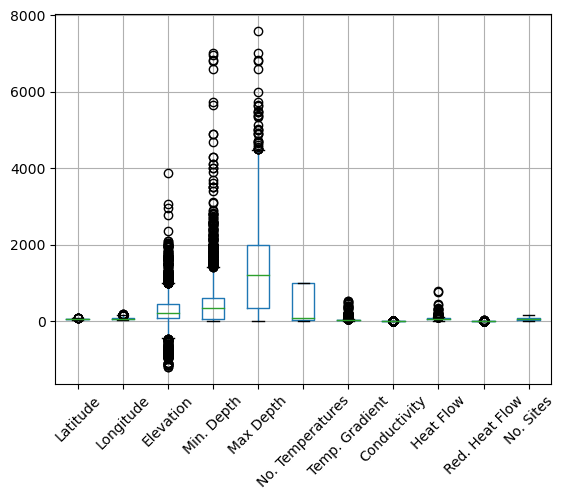

In [30]:
df.boxplot(rot=45)

There is data as in the `Min. Depth` feature whose value is above 8000 which does not make sense because the value of `Min. Depth` should always be smaller than `Max. Depth`, where there is no `Max. Depth` that is around 8000. Also, the `Min Depth` value should not be negative. Erroneous data found was successfully eliminated. As for the `Elevation` feature, it is negative because the measurement is done below sea level, so the negative value of the `Elevation` feature will not be eliminated.

#### Data Duplicate Identification and Termination 

In [31]:
df.duplicated().sum()

29

There are 29 duplicate data, then the duplicate data is eliminated

In [32]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [33]:
df.shape

(3992, 13)

# Data Analytics

#### Descriptive Statistics and Cardinalities 

In [34]:
df.describe()

,Latitude,Longitude,Elevation,Min. Depth,Max Depth,No. Temperatures,Temp. Gradient,Conductivity,Heat Flow,Red. Heat Flow,No. Sites
count,3992.00000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000
mean,51.21477,64.610165,269.479547,463.355474,1284.241949,348.032565,33.232214,2.013201,55.147044,1.215180,56.585922
std,7.77139,31.946194,413.437537,590.059064,1068.098102,440.594598,31.872521,0.755777,29.671832,1.064231,37.186193
min,35.35000,19.983000,-1200.000000,2.000000,1.000000,0.000000,2.000000,0.180000,9.000000,1.000000,1.000000
25%,45.22900,38.487500,84.750000,60.000000,340.000000,20.750000,20.000000,1.700000,40.000000,1.000000,16.000000
50%,51.87500,55.266650,217.964760,340.000000,1200.000000,82.000000,27.000000,1.910000,52.000000,1.000000,55.000000
75%,55.58330,80.058325,441.500000,600.000000,2000.000000,999.000000,34.000000,2.330000,64.000000,1.000000,84.000000
max,73.91670,178.833300,3874.000000,7013.000000,7593.000000,999.000000,530.000000,9.400000,790.000000,28.000000,168.000000


In [35]:
df.describe(include=['O'])

,Codes,Site Name
count,3992,3992
unique,281,2765
top,EGLOQB,undetermined
freq,232,459


In [36]:
categoric_df = df.select_dtypes(include="object")

column = categoric_df.columns
unique = [categoric_df[i].unique() for i in column]
n_unique = [len(categoric_df[i].unique()) for i in column]

pd.DataFrame({
    'column': column,
    'n_unique': n_unique,
    'unique': unique
})

,column,n_unique,unique
0,Codes,281,"[EAAAHB, EAAAIB, EAABAB, EAABHA, EAABIA, EAABI..."
1,Site Name,2765,"[26P, undetermined, 16, 3, 1, P7, 10, 175, 1S,..."


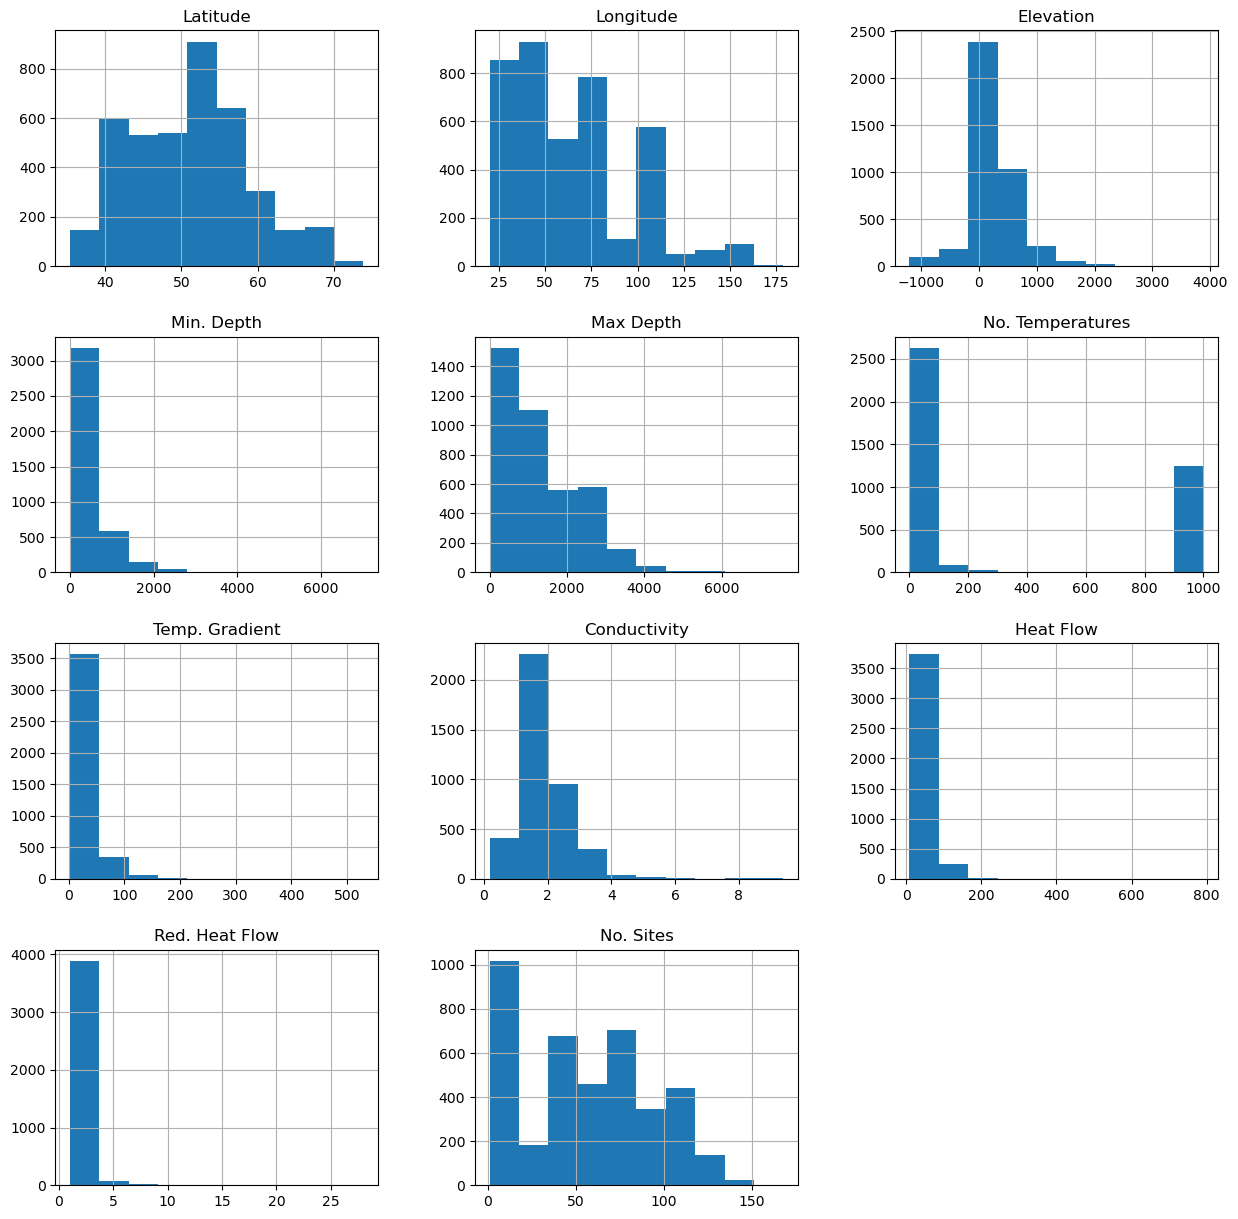

In [37]:
df.hist(figsize=(15,15));

Since the `Temp. Gradient`, `Conductivity` and `Heat Flow` column has the characteristics of a right-skewed distribution, we will check the median.

In [38]:
median_temp_gradient = df['Temp. Gradient'].median()
median_conductivity = df['Conductivity'].median()
median_heat_flow = df['Heat Flow'].median()

print("Median Temperature Gradient:", median_temp_gradient)
print("Median Conductivity:", median_conductivity)
print("Median Heat Flow:", median_heat_flow)

Median Temperature Gradient: 27.0
Median Conductivity: 1.91
Median Heat Flow: 52.0


Geothermal characteristics in Russia based on this dataset have an average Temperature Gradient of 27 mK/m, thermal conductivity of 1.91 W/mK, and Heat Flow of 52 mW/m^2.

#### Geothermal Potential Sites Physical Properties 

To see the site from the measurement of physical parameters, it is better to use the median rather than the mean. Because when there are outliers in the measurement of physical parameters, the median value will be more representative than the mean value because it is not affected by these extreme values. As a result, the median will give a more accurate picture among the data set. So, using the median is more consistent and safer for evaluating a site's prospects from its physical parameter measurements.

In [39]:
# Group data by 'Site Name' and calculate median for 'Conductivity' in each group
median_conductivity_by_site = df.groupby('Site Name')['Conductivity'].median()

# Sort the median values in descending order
sorted_median_conductivity = median_conductivity_by_site.sort_values(ascending=False)

# Get the top five median values
top_five_median_conductivity = sorted_median_conductivity.head(5)

print("Top Five Median Conductivity by Site Name:")
print(top_five_median_conductivity)

Top Five Median Conductivity by Site Name:
Site Name
4,8,11      9.4
TREKHSE1    8.6
NEFTEKU5    8.3
SARATOV6    7.7
VYSHKOVO    6.7
Name: Conductivity, dtype: float64


In [40]:
# Group data by 'Site Name' and calculate median for 'Conductivity' in each group
median_heatflow_by_site = df.groupby('Site Name')['Heat Flow'].median()

# Sort the median values in descending order
sorted_median_heatflow = median_heatflow_by_site.sort_values(ascending=False)

# Get the top five median values
top_five_median_heatflow = sorted_median_heatflow.head(5)

print("Top Five Median Heat Flow by Site Name:")
print(top_five_median_heatflow)

Top Five Median Heat Flow by Site Name:
Site Name
OKSU        276.0
EKV   23    209.0
EKV   22    209.0
DYAR2-0     207.0
LEKHOVS4    184.0
Name: Heat Flow, dtype: float64


In [41]:
# Group data by 'Site Name' and calculate median for 'Conductivity' in each group
median_tempgradient_by_site = df.groupby('Site Name')['Temp. Gradient'].median()

# Sort the median values in descending order
sorted_median_tempgradient = median_tempgradient_by_site.sort_values(ascending=False)

# Get the top five median values
top_five_median_tempgradient = sorted_median_tempgradient.head(5)

print("Top Five Median Temp. Gradient by Site Name:")
print(top_five_median_tempgradient)

Top Five Median Temp. Gradient by Site Name:
Site Name
VOSKHOD3    335.0
BORZH228    320.0
U-RUSSKI    300.0
EKV   22    220.0
EKV   23    220.0
Name: Temp. Gradient, dtype: float64


In [42]:
# List of unique values in the 'Site Name' column
top5_heatflow_sites = ['OKSU', 'EKV   23', 'EKV   22', 'DYAR2-0', 'LEKHOVS4']

# Filter the data for the selected unique values in the 'Site Name' column
filtered_data = df[df['Site Name'].isin(top5_heatflow_sites)]

# Calculate median for 'Heat Flow' and 'Temp. Gradient' for each unique value in 'Site Name'
median_conductivity = filtered_data.groupby('Site Name')['Conductivity'].median()

# Print the median values
print("Top 5 heat flow site, and their conductivity:")
print(median_conductivity)

Top 5 heat flow site, and their conductivity:
Site Name
DYAR2-0     2.72
EKV   22    0.95
EKV   23    0.95
LEKHOVS4    2.15
OKSU        2.80
Name: Conductivity, dtype: float64


In [43]:
# List of unique values in the 'Site Name' column
top5_tempgradient_sites = ['VOSKHOD3', 'BORZH228', 'U-RUSSKI']

# Filter the data for the selected unique values in the 'Site Name' column
filtered_data = df[df['Site Name'].isin(top5_tempgradient_sites)]

# Calculate median for 'Heat Flow' and 'Temp. Gradient' for each unique value in 'Site Name'
median_conductivity = filtered_data.groupby('Site Name')['Conductivity'].median()

# Print the median values
print("Top 5 temp. gradient site, and their conductivity:")
print(median_conductivity)

Top 5 temp. gradient site, and their conductivity:
Site Name
BORZH228    1.65
U-RUSSKI    1.90
VOSKHOD3    1.80
Name: Conductivity, dtype: float64


In [44]:
# List of unique values in the 'Site Name' column
top5_conductivity_sites = ['4,8,11', 'TREKHSE1', 'NEFTEKU5', 'SARATOV6', 'VYSHKOVO']

# Filter the data for the selected unique values in the 'Site Name' column
filtered_data = df[df['Site Name'].isin(top5_conductivity_sites)]

# Calculate median for 'Heat Flow' and 'Temp. Gradient' for each unique value in 'Site Name'
median_heat_flow = filtered_data.groupby('Site Name')['Heat Flow'].median()
median_temp_gradient = filtered_data.groupby('Site Name')['Temp. Gradient'].median()

# Print the median values
print("Top 5 conductivity site, and their heat flow:")
print(median_heat_flow)

print("\nTop 5 conductivity site, and their temp. gradient:")
print(median_temp_gradient)

Top 5 conductivity site, and their heat flow:
Site Name
4,8,11      52.0
NEFTEKU5    79.0
SARATOV6    56.0
TREKHSE1    69.0
VYSHKOVO    79.0
Name: Heat Flow, dtype: float64

Top 5 conductivity site, and their temp. gradient:
Site Name
4,8,11      27.0
NEFTEKU5    43.0
SARATOV6    32.0
TREKHSE1    37.0
VYSHKOVO    46.0
Name: Temp. Gradient, dtype: float64


From the data analysis, two sites were found with sufficient physical parameter values to be considered as prospects. 

In [45]:
selected_sites = ['VYSHKOVO', 'NEFTEKU5']

# Filter the data based on the selected site names
selected_data = df[df['Site Name'].isin(selected_sites)]

selected_data


,Codes,Site Name,Latitude,Longitude,Elevation,Min. Depth,Max Depth,No. Temperatures,Temp. Gradient,Conductivity,Heat Flow,Red. Heat Flow,No. Sites
1779,EGAFHB,VYSHKOVO,48.050,23.367,350.0,20.0,620.0,82.0,46.0,6.7,79,1.0,16.0
2140,EFABHB,NEFTEKU5,44.667,45.017,49.0,110.0,2735.0,99.0,43.0,8.3,79,1.0,116.0


Previously we found the unique value BAIKAL in the Site Name feature, it has 333 rows of data which is relatively a lot of information, we will check the median of the physical properties of the site named BAIKAL.

In [46]:
baikal_count = df[df['Site Name'] == 'BAIKAL'].shape[0]
baikal_count

333

In [47]:
# Filter the data for the unique value 'BAIKAL' in the 'Site Name' feature
baikal_data = df[df['Site Name'] == 'BAIKAL']

# Calculate the median Conductivity, Heat Flow, and Temp. Gradient for 'BAIKAL'
median_conductivity = baikal_data['Conductivity'].median()
median_heat_flow = baikal_data['Heat Flow'].median()
median_temp_gradient = baikal_data['Temp. Gradient'].median()

# Display the results
print(f"Median Conductivity for 'BAIKAL': {median_conductivity}")
print(f"Median Heat Flow for 'BAIKAL': {median_heat_flow}")
print(f"Median Temp. Gradient for 'BAIKAL': {median_temp_gradient}")


Median Conductivity for 'BAIKAL': 0.8
Median Heat Flow for 'BAIKAL': 68.0
Median Temp. Gradient for 'BAIKAL': 81.0


__Observation:__  
* It can be seen that sites EKV 22 and EKV 23 are among the top 5 sites with the most significant median measurement of heat flow and temperature gradient, but both sites have relatively low median thermal conductivity values.  
* NEFTEKU5 (long: 45.017; lat: 44.667) and VYSHKOVO (long: 23.367; lat: 48.050) sites, can be said to be a potential geothermal prospect because they indicate extremely high thermal conductivity values, as well as heat flow and temperature gradient measurements with considered values.  
* Both sites were measured using vertical boreholes (code letter 'A'), the latest orogenic disturbance affecting the NEFTEKU5 site area is the Mesozoic Orogeny (code letter 'F') and VYSHKOVO is the tertiary Orogeny or volcanic zone (code letter 'G').
* Although the site named BAIKAL has a lot of information from the data, here it is found that the median thermal conductivity value at the BAIKAL site is relatively low, and therefore not considered a geothermal prospect.

#### Operational Geothermal: Codes Descriptive Statistics 

In [48]:
# Rename the column to match the column name in the df dataset
df['Codes'] = df['Codes'].astype(str)

# Create a function to extract the second character from each unique value
def get_second_character(value):
    return value[1] if len(value) >= 2 else None

# Find the second character in each unique value and count its frequency
second_characters = df['Codes'].apply(get_second_character)
frequency2 = second_characters.value_counts()

print(frequency2)


E    1021
G     998
B     728
C     617
F     344
D     102
A      92
n      52
R      28
H       6
P       2
Z       1
Name: Codes, dtype: int64


In [49]:
# Create a function to extract the second character from each unique value
def get_third_character(value):
    return value[2] if len(value) >= 3 else None

# Find the second character in each unique value and count its frequency
third_characters = df['Codes'].apply(get_third_character)
frequency3 = third_characters.value_counts()

print(frequency3)

A    3528
L     334
P      72
d      52
B       3
R       2
Name: Codes, dtype: int64


In [50]:
# Create a function to extract the fourth character from each unique value
def get_fourth_character(value):
    return value[3] if len(value) >= 4 else None

# Find the fourth character in each unique value and count its frequency
fourth_characters = df['Codes'].apply(get_fourth_character)
frequency4 = fourth_characters.value_counts()

# Display the results
print(frequency4)

F    1433
B     971
E     411
Z     370
O     286
R     148
G     146
N     124
e      52
A      50
Name: Codes, dtype: int64


__Observation:__ 
* Based on the coding for tectonic setting (the second character of the six-letter-code), it was found that most of the sites associated with the last orogenic disturbance were in code 'E' which represents Late Paleozoic Orogeny followed by code 'G' which is Tertiary Orogeny or Volcanic Zone, and followed by code 'B' which is Proterozoic
* While for the third letter code the most found in the data is for the code 'A' which represents the temperature measurement in the vertical borehole.
* Meanwhile, the fourth character code that is most common is the letter code 'F', which represents thermal conductivity measurements by estimating its value using correlation with nearby boreholes, followed by the letter code 'B', which means the measurements were made using the transient method in the laboratory.
* In the case of the second letter code, there is the letter 'n', the third letter code case has the letter 'd', and the fourth letter code case has the letter 'e', this could be an error when inputting data, because these letters are not in the coding guidelines.

# Spatial Data Analysis

In [51]:
data = json.loads(open("russland.geojson").read())

In [52]:
def plot_russia(xlim = (0,190), ylim = (40,80), figsize=(40,20), ax=None):
    """Generate a map with country outlines of Europe
    
    Args:
    - xlim = (xmin, xmax): extent in x (longitudinal) direction
    - ylim = (ymin, ymax): extent in y (latitudinal) direction
    - figsize: Matplotlib figure size
    - ax = Matplotlib axis object (default: new figure)
    """
    if ax==None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot()

    for i in range(len(data['features'])):
        line = np.squeeze(np.array(data['features'][i]['geometry']['coordinates']))
        try: 
            ax.plot(line[:,0], line[:,1], 'k-')
        except IndexError:
            for l in line:
                l = np.array(l)
                try:
                    ax.plot(l[:,0], l[:,1], 'k-')
                except IndexError:
                    for l2 in l:
                        l2 = np.array(l2)
                        ax.plot(l2[:,0], l2[:,1], 'k-')

    
    plt.grid()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

C:\Users\arbie\AppData\Local\Temp\ipykernel_13304\1088334815.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  line = np.squeeze(np.array(data['features'][i]['geometry']['coordinates']))


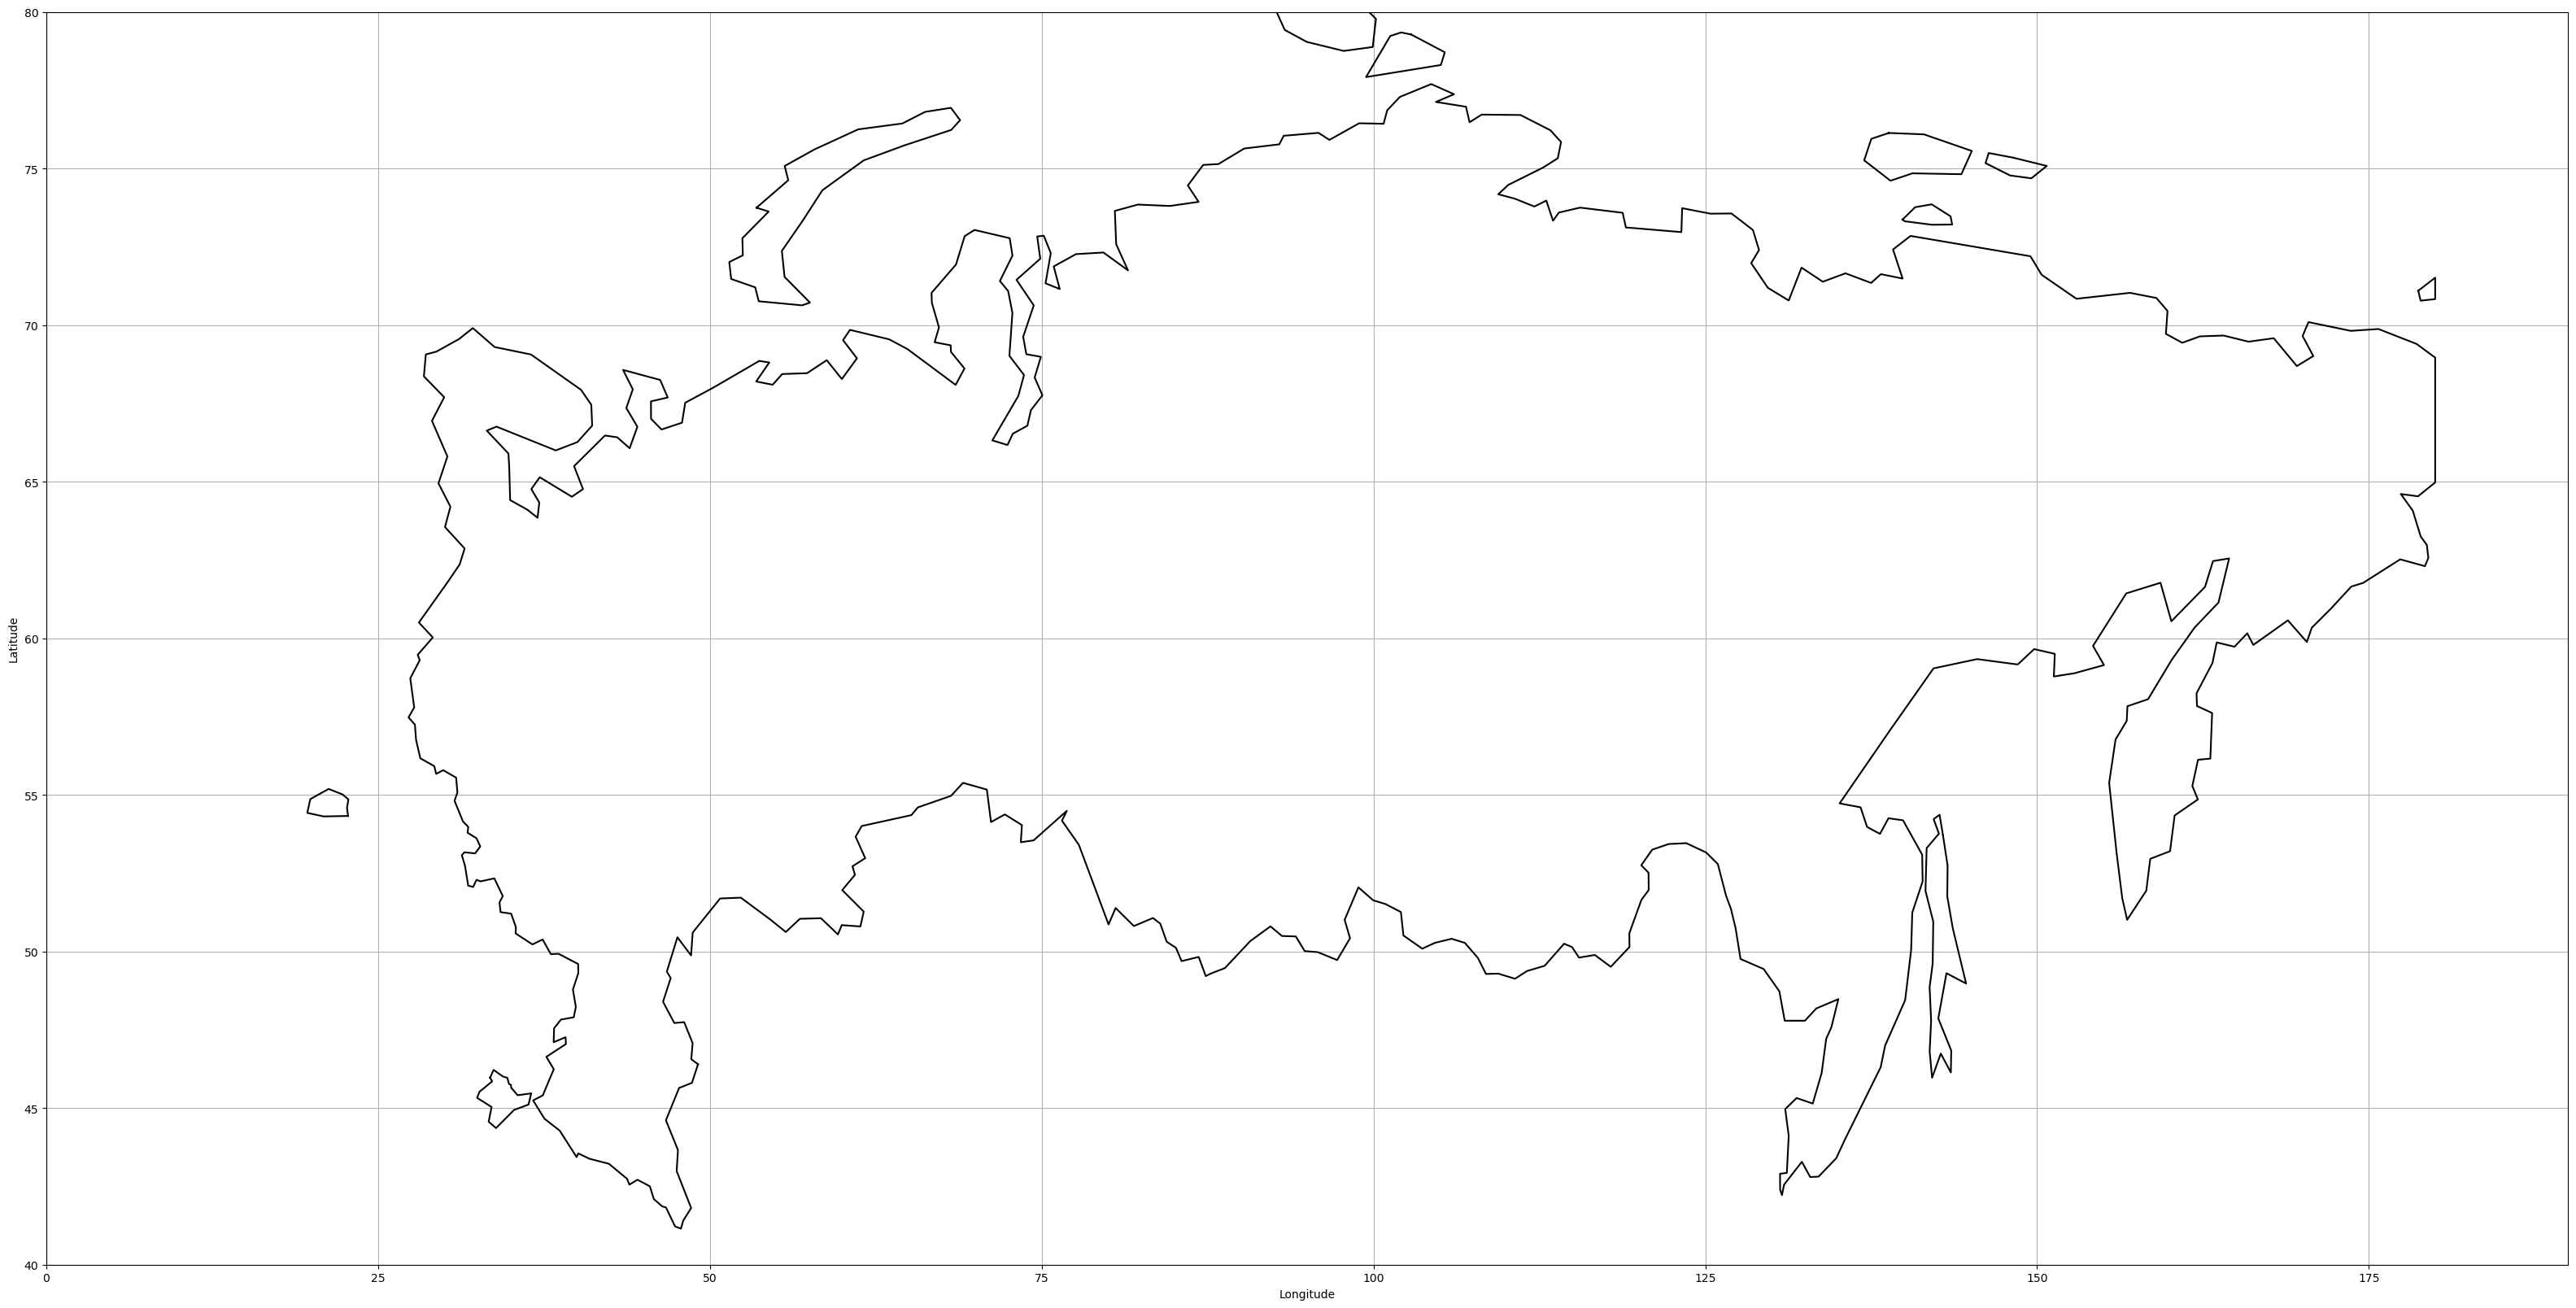

In [53]:
plot_russia()

In [54]:
longitude = df['Longitude'].to_numpy()
latitude = df['Latitude'].to_numpy()
conductivity = df['Conductivity'].to_numpy()

C:\Users\arbie\AppData\Local\Temp\ipykernel_13304\1088334815.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  line = np.squeeze(np.array(data['features'][i]['geometry']['coordinates']))


Text(0.5, 1.0, ' The Distribution of Conductivity Measurement Points in Russian Federation ')

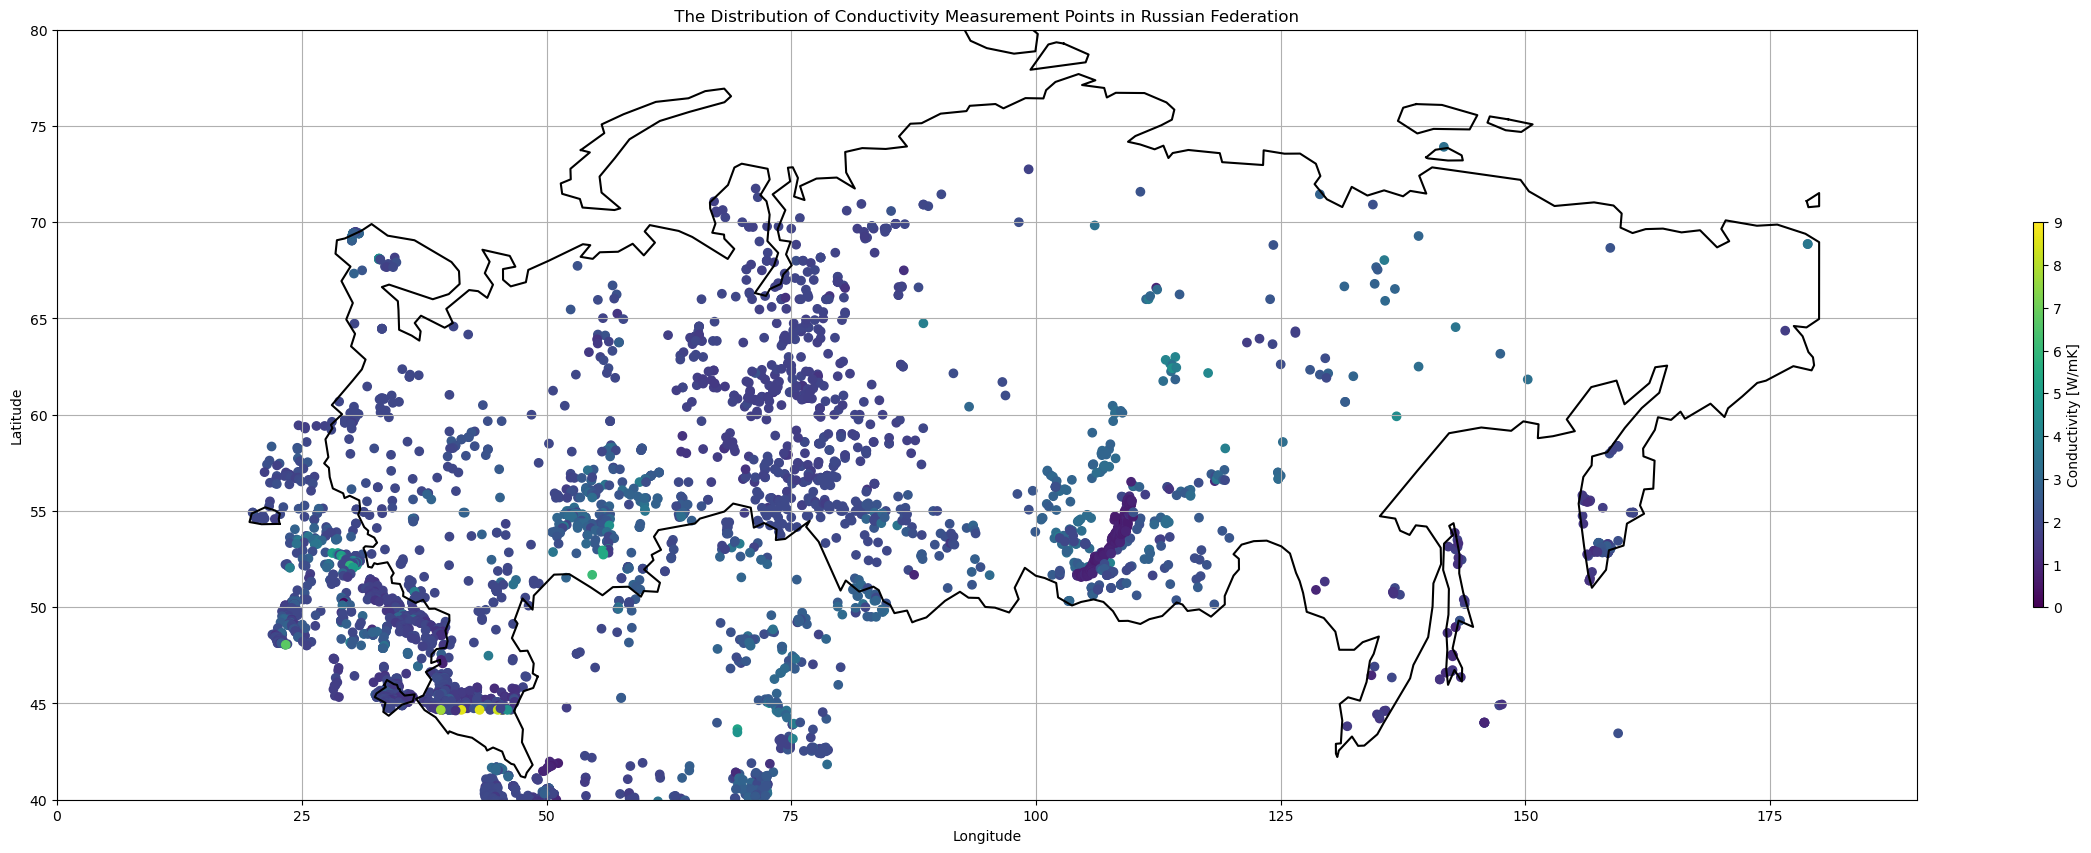

In [55]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot()

scat = ax.scatter(longitude, latitude, c=conductivity, vmin=0, vmax=9)
cbar = plt.colorbar(scat, label="Conductivity [W/mK]", shrink=0.5, aspect=40)
plot_russia(ax=ax)
plt.title(' The Distribution of Conductivity Measurement Points in Russian Federation ')

In [56]:
selected_spatial_info = selected_data[['Site Name', 'Longitude', 'Latitude']]
selected_spatial_info

,Site Name,Longitude,Latitude
1779,VYSHKOVO,23.367,48.050
2140,NEFTEKU5,45.017,44.667


C:\Users\arbie\AppData\Local\Temp\ipykernel_13304\1088334815.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  line = np.squeeze(np.array(data['features'][i]['geometry']['coordinates']))


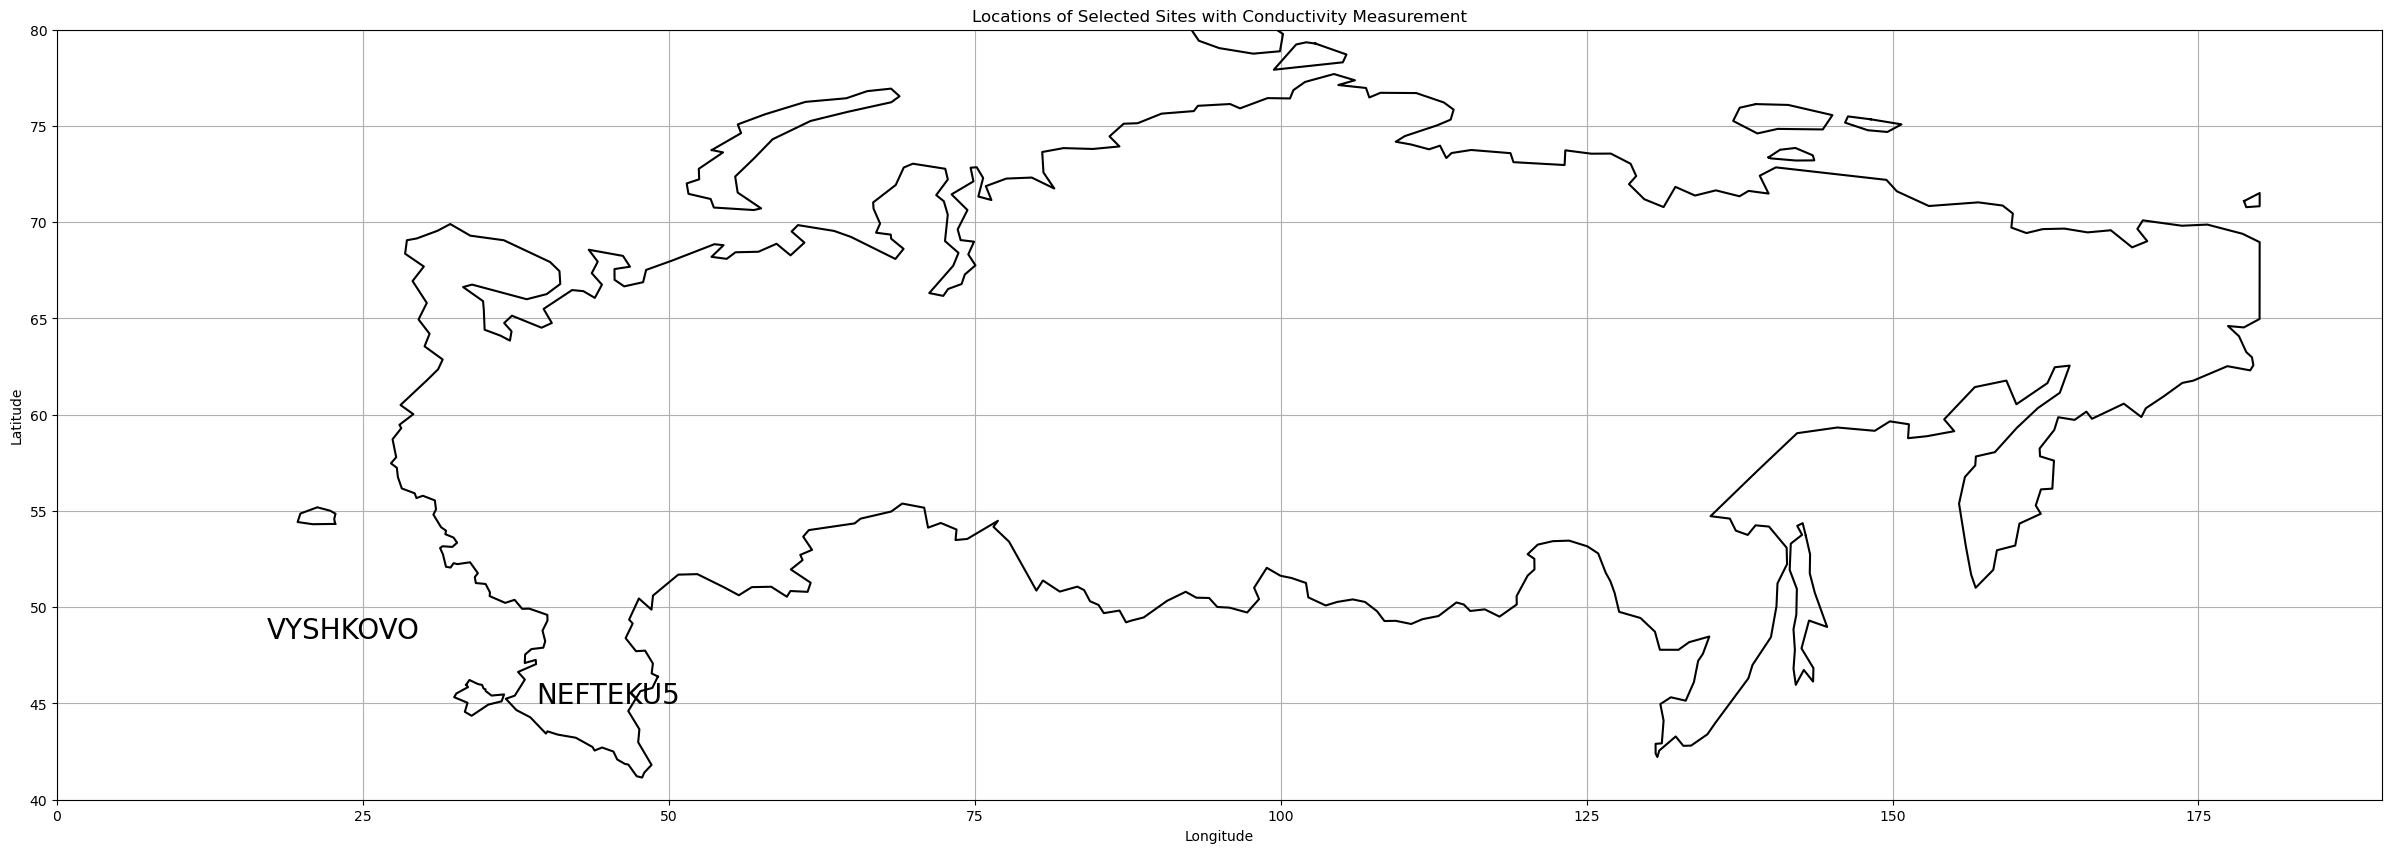

In [57]:
# Plot the locations on a map
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot()
plot_russia(ax=ax)

# Add labels to each point
for index, row in selected_spatial_info.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Site Name'], fontsize=20, ha='center', va='bottom')

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Locations of Selected Sites with Conductivity Measurement')

plt.show()

In [58]:
from scipy.interpolate import griddata

In [59]:
# for simplicity, we will store our varibles in x,y,z:
x = longitude 
y = latitude
z = conductivity
# define axes for interpolation grid:
xi = np.arange(0, 50, 0.1) 
yi = np.arange(40, 55, 0.1) 
# perform interpolation:
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

C:\Users\arbie\AppData\Local\Temp\ipykernel_13304\1088334815.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  line = np.squeeze(np.array(data['features'][i]['geometry']['coordinates']))


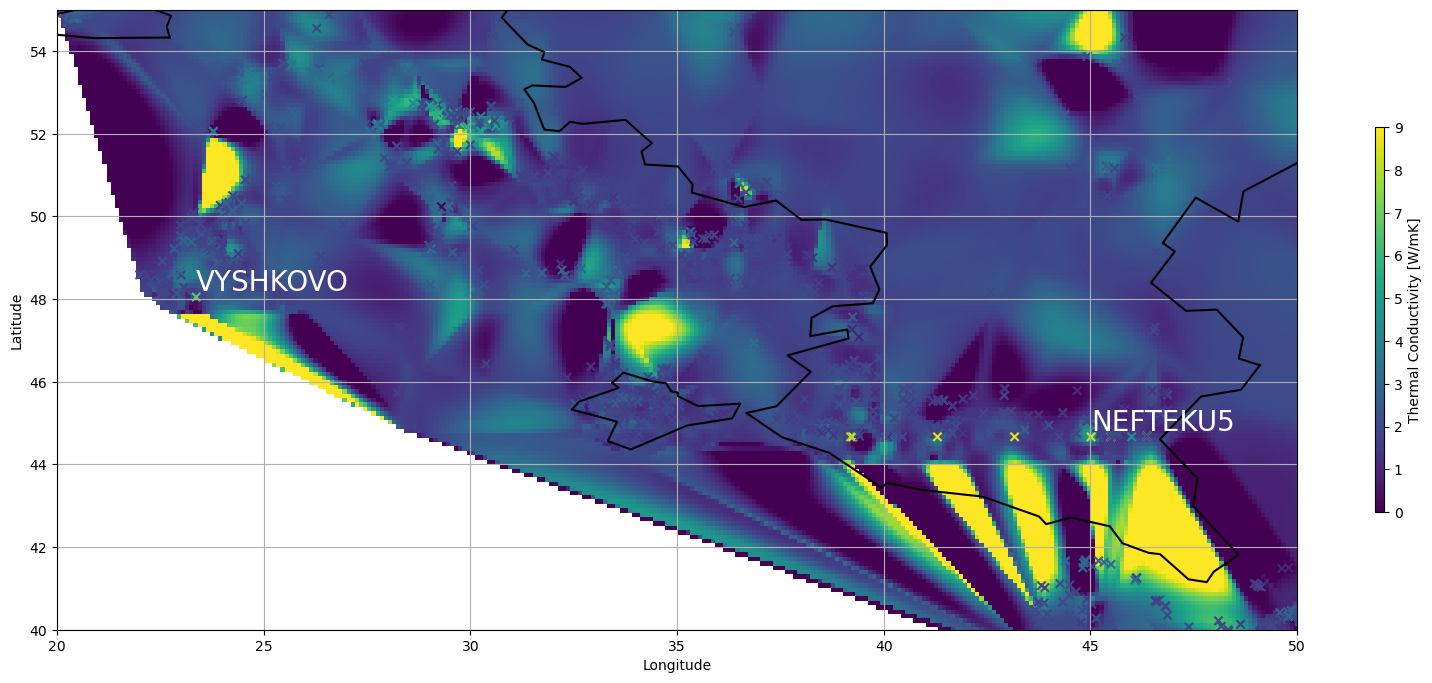

In [60]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
im = ax.imshow(zi, cmap="viridis", extent=(0,50, 39,55), alpha=1, origin='lower', vmin=0, vmax=9)
plt.colorbar(im, label="Thermal Conductivity [W/mK]", shrink=0.5, aspect=40)
plot_russia(xlim = (20,50), ylim = (40,55), ax=ax)
# Add labels to each point
for index, row in selected_spatial_info.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Site Name'], fontsize=20, ha='left', va='bottom', color='white')
ax.scatter(longitude, latitude,marker='x', c=conductivity, cmap='viridis', vmin=0, vmax=9)

__Observation:__ 
* Based on the interpolation map, it can be seen that the distribution of the highest thermal conductivity is in the southwest of Russia as a whole. Interpolation plotting using qualitative data gridding techniques is still so rough, but areas with high thermal conductivity values can be delineated.

# Conclusion and Recommendation

### Conclusion 

   1. Based on the geothermal prospect analysis, we have identified two promising sites named VYSHKOVO and NEFTEKU5. These sites exhibit thermal conductivity values above 6 W/mK, indicating potential geothermal activity. Additionally, they have heat flow levels of 79 mW/m^2 and temperature gradients within the range of 43 - 46 mK/m, further supporting their geothermal prospects.

   2. Site NEFTEKU5 is associated with the Mesozoic Orogeny, while VYSHKOVO is linked to tertiary orogenic or volcanic zones. This geological information is essential in understanding the underlying geological conditions that may influence geothermal activities.

### Recommendation 


   1. Exploration at the NEFTEKU5 site can be prioritized due to its favorable onshore location and promising geological affiliation, making it a potential candidate for successful geothermal energy extraction.

   2. Conducting further research and exploration in locations linked with Mesozoic Orogeny or Tertiary Orogenic, similar to site NEFTEKU5 and VYSHKOVO, is highly recommended. The these orogenies suggest geological conditions that are conducive to geothermal activity and the potential for significant heat resources.

   3. RBF interpolation can be applied as RBF interpolation offers a more flexible and robust solution for interpolating scattered data points, especially when dealing with irregular grids or sparse data distributions.

   4. We can leverage machine learning regression models to predict heat flow values based on the features present in the dataset. This predictive model will enable us to estimate heat flow values in locations where direct measurements might be challenging or unavailable, thus extending our understanding of geothermal prospects across a broader geographic region.